# Module 5. Labs two-sample t-test

In [1]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz

# T-testen

We onderscheiden twee soorten testen: testen voor onafhankelijke steekproeven en testen voor gepaarde steekproeven.

* Een voorbeeld van een onafhankelijk onderzoek is die naar een medische behandelingsmethode waar een controlegroep de behandeling niet krijgt en een testgroep de behandeling wél krijgt.
* Een voorbeeld van een gepaard onderzek is wanneer je twee metingen uitvoerd op hetzelfde lid van een populatie. Bijvoorbeeld koorts nemen voor en na het innemen van een medicijn om het effect ervan te meten.

## Android Persistence libraries performance vergelijking

We gebruiken nogmaals de Android dataset. Nu willen we bevestigen wat het beste type persistentie is. Iets is beter wanneer het `significant` beter is dan de competitie.,
Bij het ophalen van de dataset willen we alles groeperen op basis van zowel datasize als persistentietype. De beste combo zal die zijn met de laagste/snelste tijd.

In [2]:
ap = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/android_persistence_cpu.csv', delimiter=';')
ap.groupby(['DataSize', 'PersistenceType'])['Time'].mean()

DataSize  PersistenceType  
Large     GreenDAO             12.110333
          Realm                10.651667
          SQLLite              11.515000
Medium    GreenDAO              7.454000
          Realm                 5.818000
          SQLLite               7.794000
Small     GreenDAO              1.893667
          Realm                 1.599000
          SQLLite               1.799000
          Sharedpreferences     1.673667
Name: Time, dtype: float64

Eerst wil ik weten of de tijd van Realm significant beter is dan die van SharedPreferences. De nulhypothese is dus `m1 - m2 = 0` met een alternatieve hypothese van `m1 - m2 < 0`. We berekenen eerst een array met de tijden voor een `Kleine` datasize met enerzijds `Realm`, anderzijds `SharedPref`. Op basis van deze twee arrays gaan we een T-test uitvoeren. Als `alternative` geven we less mee en als laatst moeten we ook meegeven of we een standaard T-test `equal_var=True` of een Welch T-test `equal_var=True` moeten uitvoeren.

In [3]:
realm = np.array(ap[(ap.DataSize == 'Small') & (ap.PersistenceType == 'Realm')]['Time'])
print(realm)

sharedpref = np.array(ap[(ap.DataSize == 'Small') & (ap.PersistenceType == 'Sharedpreferences')]['Time'])
print(sharedpref)

resultaatTTest = stats.ttest_ind(a=realm, b=sharedpref, alternative='less', equal_var=False)

[1.57 1.77 1.75 1.78 1.36 2.17 1.58 1.59 1.36 1.55 1.33 1.96 1.58 1.59
 1.78 1.31 1.59 2.25 1.34 2.27 1.74 1.31 1.81 1.13 1.58 1.14 1.98 1.33
 1.12 1.35]
[1.81 1.35 1.84 1.54 1.81 1.82 1.79 1.57 1.78 1.79 1.97 1.6  1.77 2.23
 1.79 1.77 1.32 1.76 2.   1.3  1.77 1.35 1.56 1.79 1.31 2.23 1.83 1.09
 1.57 1.1 ]


De $p$ waarde is hier 0.1699 wat betekent dat de nulhypothese niet wordt verworpen. Er is niet voldoende bewijs om de nulhypothese te verwerpen én er is géén significant verschil in de Time tussen Realm en SharedPreferences bij een Small datasize.

In [4]:
resultaatTTest.pvalue

0.16992370571901427

Hieronder voeren we dezelfde test uit voor een DataSize van `Medium` en tussen de types `Realm` en `GreenDAO`.

In [5]:
realm = np.array(ap[(ap.DataSize == 'Medium') & (ap.PersistenceType == 'Realm')]['Time'])
#print(realm)

greendao = np.array(ap[(ap.DataSize == 'Medium') & (ap.PersistenceType == 'GreenDAO')]['Time'])
#print(greendao)

resultaatTTest = stats.ttest_ind(a=realm, b=greendao, alternative='less', equal_var=False)

resultaatTTest.pvalue

0.0002506300568234833

Hieronder voeren we dezelfde test uit voor een DataSize van `Large` en tussen de types `Realm` en `SQLLite`.

In [6]:
realm = np.array(ap[(ap.DataSize == 'Large') & (ap.PersistenceType == 'Realm')]['Time'])
#print(realm)

sqlite = np.array(ap[(ap.DataSize == 'Large') & (ap.PersistenceType == 'SQLLite')]['Time'])
#print(sqlite)

resultaatTTest = stats.ttest_ind(a=realm, b=sqlite, alternative='less', equal_var=False)

resultaatTTest.pvalue

0.0016999220614984435

### Answers

The table below provides an overview of the best and second best persistence type for each data size (based on the sample mean).

| Data Size | Best  | 2nd Best          | p-value   |
| :-------- | :---- | :---------------- | :-------- |
| Small     | Realm | SharedPreferences | 0.1699    |
| Medium    | Realm | GreenDAO          | 0.0002506 |
| Large     | Realm | SQLite            | 0.0017    |

The conclusion of Akin (2016), which states that Realm is the most efficient persistence type, still holds, but for the small data sets the difference is not significant.

Note that we have not explicitly selected a specific significance level in advance. However, for $\alpha$ = 0.1, 0.05 or even 0.01, the same conclusion can be drawn.

##  Comparing test results between groups

We halen de testresultaten dataset op. We kijken eerst om alle null-waarden uit de dataset te halen. Dit kunnen we simpelweg met `dropna` doen. Daarna gaan we groeperen op basis van het soort Sessie. Dit doen we met `groupby` en we vragen erna centrum- en spreidingsmaten op met `describe`.

In [7]:
test = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/test-results.csv')

test = test.dropna()

test.groupby('Session').describe()

Score                                                          
        count       mean       std   min     25%     50%     75%    max
Session                                                                
A        17.0  13.117647  6.040306   4.0   8.000  12.500  17.000  26.50
B        21.0  17.214286  9.150917   1.0  10.000  14.500  26.500  31.50
C        25.0  18.800000  6.539941  10.0  13.000  18.500  22.000  34.50
D        26.0  22.451923  4.641670  13.0  19.125  22.125  25.750  30.50
E        22.0  18.852273  7.010052   0.0  16.375  19.250  21.375  30.75
F        27.0  17.814815  6.274028   6.5  12.875  17.500  22.000  32.00
G        29.0  18.736207  5.261126  10.0  16.500  18.750  23.000  27.75
H        28.0  20.946429  8.133537   3.0  15.750  22.000  26.625  34.50

<AxesSubplot:xlabel='Session', ylabel='Score'>

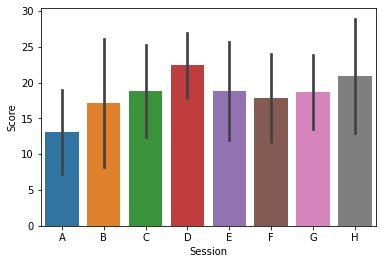

In [8]:
sns.barplot(data=test,x='Session', y='Score', ci='sd')

<AxesSubplot:xlabel='Score', ylabel='Session'>

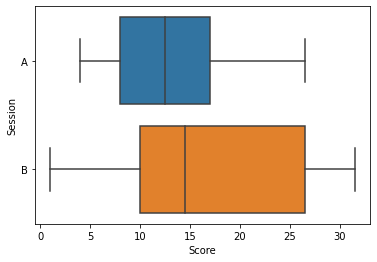

In [9]:
# Boxplot maken
# A tegenover B plaatsen
sns.boxplot(data=test[(test.Session=='A') | (test.Session=='B')],x='Score', y='Session')

<AxesSubplot:xlabel='Score', ylabel='Session'>

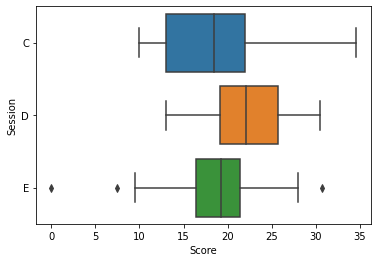

In [10]:
# C, D en E tegenover elkaar zetten
sns.boxplot(data=test[(test.Session == 'C') | (test.Session == 'D') | (test.Session == 'E')], x='Score', y='Session')

In [11]:
alpha = 0.05

In [12]:
scoresVanA = np.array(test[(test.Session == 'A')]['Score'])
scoresVanB = np.array(test[(test.Session == 'B')]['Score'])

print(scoresVanA)

p = stats.ttest_ind(a=scoresVanA, b=scoresVanB, alternative='less', equal_var=False).pvalue

print(f'De p-waarde tussen A en B is {p:.3f}')

if(p < alpha):
    print(f'Het verschil is niet significant genoeg.')
else:
    print(f'Het verschil is significant genoeg.')

[12.5  7.5 21.  10.  20.5 14.   4.   7.   7.5  8.  13.5 26.5 18.  16.
 10.5 17.   9.5]
De p-waarde tussen A en B is 0.054
Het verschil is significant genoeg.


In [21]:
scoresVanC = np.array(test[(test.Session == 'C')]['Score'])
scoresVanD = np.array(test[(test.Session == 'D')]['Score'])
p = stats.ttest_ind(a=scoresVanC, b=scoresVanD, alternative='less', equal_var=False).pvalue
print(f'De p-waarde tussen C en D is {p:.3f}')

if(p < alpha):
    print(f'Het verschil is niet significant genoeg.')
else:
    print(f'Het verschil is significant genoeg.')

De p-waarde tussen C en D is 0.013
Het verschil is niet significant genoeg.


In [22]:
scoresVanE = np.array(test[(test.Session == 'E')]['Score'])
scoresVanD = np.array(test[(test.Session == 'D')]['Score'])
p = stats.ttest_ind(a=scoresVanE, b=scoresVanD, alternative='less', equal_var=False).pvalue
print(f'De p-waarde tussen C en D is {p:.3f}')

if(p < alpha):
    print(f'Het verschil is niet significant genoeg.')
else:
    print(f'Het verschil is significant genoeg.')

De p-waarde tussen C en D is 0.024
Het verschil is niet significant genoeg.


### Answers

The average score in each session was:

| Session | Average score |
| :-----: | :------------ |
|    A    | 13.1          |
|    B    | 17.2          |
|    C    | 18.8          |
|    D    | 22.5          |
|    E    | 18.9          |
|    F    | 17.8          |
|    G    | 18.7          |
|    H    | 20.9          |

The table below shows the p-value of a one-sided t-test of two samples between the given sessions:

| Alt. hypothesis                       | p-value   |
| :------------------------------------ | :-------- |
| $\overline{x}_A - \overline{x}_B < 0$ | 0.05356   |
| $\overline{x}_C - \overline{x}_D < 0$ | 0.01343   |
| $\overline{x}_E - \overline{x}_D < 0$ | 0.02356   |
| $\overline{x}_F - \overline{x}_H < 0$ | 0.05767   |
| $\overline{x}_G - \overline{x}_H < 0$ | 0.1156    |
| $\overline{x}_C - \overline{x}_H < 0$ | 0.1463    |
| $\overline{x}_A - \overline{x}_H < 0$ | 0.0003289 |

Remarks:

- The difference between **session A and B**, although it seems quite large, is insignificant for $\alpha = 0.05$
- **Sessions C, D and E**:
  - Session D had the highest score. Sessions C and E had similar results, at least the average score was similar.
  - Session D has a significantly higher score than either sessions C and E. However, session E came _after_ D, so the cause is definitely not the passing of information.
- The differences between **sessions F, G and H** insignificant
- **Sessions C and H** are respectively the first and the last session on the same campus. So, if there is an opportunity to pass on information about the test, there's definitely enough time between these two sessions. However, the difference is not significant!
- The difference between **sessions A and H** are significant, but since they took place on different campuses, it is questionable that this difference is caused by passing on information.